# Obligatorisk innlevering 1 - oppgave 2

I denne oppgaven skal vi forsøke å forutsi kjøp av bilforsikring ved kjøp av bil

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split,RepeatedKFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett2.csv")

In [4]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [5]:
# Her deler jeg datasettet inn i egenskaper (X) og target (y) (fjerner også den første kolonnen siden det bare er en ID 
# og har dermed ingen prediktiv verdi)

X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

# PS: Ikke endre denne kodecellen!

#### Oppgave 2.1) 
Visualiser $y\_train$ og $y\_val$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? Begrunn svaret

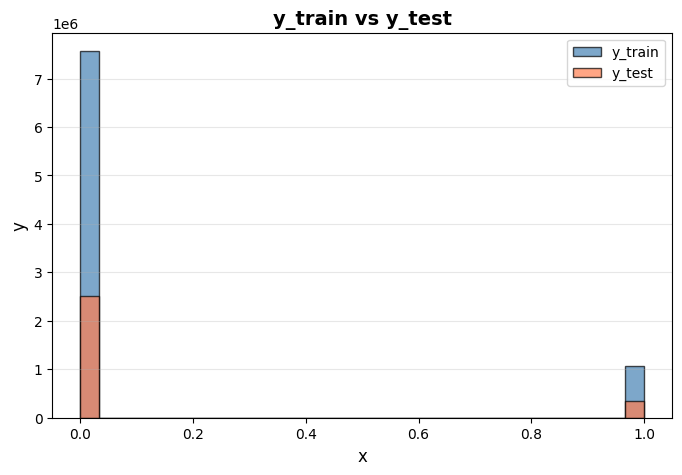

In [8]:
#TODO: visualiser y_train og y_test i et histogram
#Lager Historgramet
plt.figure(figsize=(8, 5))

#Histogram for y_train
plt.hist(y_train, bins=30, color='steelblue', alpha=0.7, label='y_train', edgecolor='black')

#Histogram for y_test
plt.hist(y_test, bins=30, color='coral', alpha=0.7, label='y_test', edgecolor='black')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

plt.title('y_train vs y_test', fontsize=14, fontweight='bold')

plt.grid(axis='y', alpha=0.3)

plt.legend()
plt.show()

**Svar:**

*< Dette er et klassifiseringsproblem fordi vi har bare 2 verdier i x aksen som kan bare være 0 eller 1>*

#### Oppgave 2.2)
Velg to modeller og gjør repeterte kryssvalideringer $(10)$ med $K=5$
* Velg hvorvidt du vil bruke "default" hyperparamtre for modellene eller om du vil gjøre et hyperparametersøk
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene skriftlig til slutt 


C:\Users\madse\AppData\Local\Temp\ipykernel_7116\314075090.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([f1_model1, f1_model2], labels=['RandomForestClassifier', 'LogisticRegression'])


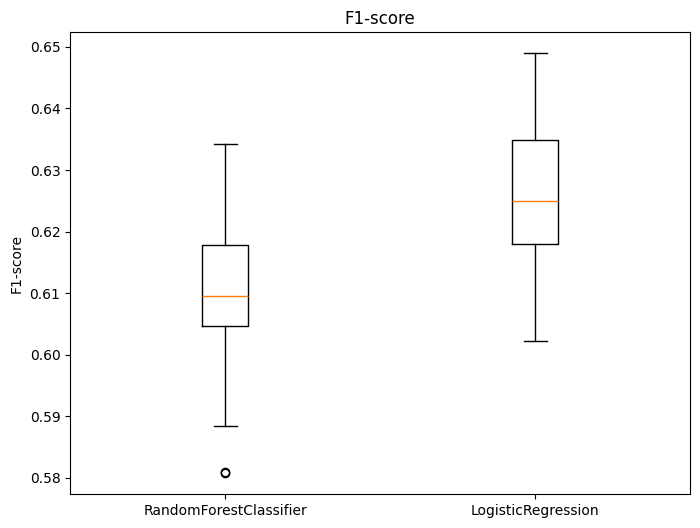


Gjennomsnitt og standardavvik for F1-score og accuracy:
Random Forest: F1 = 0.611, Accuracy = 0.560
Logistic Regression: F1 = 0.626, Accuracy = 0.585


In [32]:
#TODO: repeterte kryssvalideringer for to modeller

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

f1_scorer = make_scorer(f1_score, pos_label='Male')

model1 = RandomForestClassifier(random_state=42)
model2 = LogisticRegression(random_state=42)

rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
X_small = X_scaled[:10000]
y_small = y[:10000]

f1_model1 = cross_val_score(model1, X_small, y_small, cv=rkf, scoring=f1_scorer)
f1_model2 = cross_val_score(model2, X_small, y_small, cv=rkf, scoring=f1_scorer)

acc_model1 = cross_val_score(model1, X_small, y_small, cv=rkf, scoring='accuracy')
acc_model2 = cross_val_score(model2, X_small, y_small, cv=rkf, scoring='accuracy')

plt.figure(figsize=(8,6))
plt.boxplot([f1_model1, f1_model2], labels=['RandomForestClassifier', 'LogisticRegression'])
plt.ylabel('F1-score')
plt.title('F1-score')
plt.show()

print("\nGjennomsnitt og standardavvik for F1-score og accuracy:")
print(f"Random Forest: F1 = {f1_model1.mean():.3f}, Accuracy = {acc_model1.mean():.3f}")
print(f"Logistic Regression: F1 = {f1_model2.mean():.3f}, Accuracy = {acc_model2.mean():.3f}")


**Svar:**

*< Jeg valgte et default hyperparameter for modellene siden et hyperparametersøk ville ta lengre tid og blir ikke spurt i denne oppgaven siden du ønsker bare å sammenligne modellene og ikke optimere dem, Vi kan see etter å har kjørt koden på bare 10 000 rader Grunnen for dette er for å kjøre hele dete store datasette er urealistik (jeg prøve og etter en time med kjøring ga jeg opp) så jeg har satt en limit på 10 000 rader resultat burde være nærme nok, så er Randomforest F1 score 0.611 og Accuracy score på 0,560 mens Logistic Regression F1 score 0.626 og Accuracy score på 0,585, modellene gjør det bedre en tilfeldig gjetting (50/50). Logistic Regression gjør det bedre en Random Forest men med en forskjell på ca 1,5% så ikke så stor forskjell, kansje vis jeg kjørte hele datasettet og optimaliserte modellen så kunne resultatet være bedre>*

#### Oppgave 2.3) 
Tren de samme modellene men denne gangen med et balansert datasett
* Bruk imbalaced learn og SMOTE til å oppsample minioritetsklassen (bare oppsample treningsdataene i kryssvalideringen - ikke valideringsdataene)
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene og sammenlign resultatene med 2.2) 

In [9]:
#TODO: repeterte kryssvalideringer for de samme to modellene som i oppgave 2.2, men denne gangen med SMOTE-oppsampling 
#from imblearn.over_sampling import SMOTE

**Svar:**

*< ditt tekstsvar her >*

#### Oppgave 2.4)
Tren den beste modellen på nytt og utfør prediksjon på testsettet. Mål nå ytelsen på testsettet ved bruk av sensitivitet, spesifisitet og presisjon, itillegg til F1-skår og accuracy

In [10]:
#TODO: Tren den beste modellen fra 2.2 og 2.3 på alle treningsdataene og test på testdataene

#### Oppgave 2.5)
Del opp testsettet basert på kjønn og gjør en analyse av sensitivitet, spesifisitet og presisjon for menn og det samme for kvinner. Skriv ut og diskuter resultatet og forsøk å svar på følgende spørsmål:
* Er modellen like god for begge kjønn? 
* Hvis ikke, hva tror du er årsaken og hvilke tiltak kan vi gjøre for å forbedre modellen? 

In [11]:
#TODO: Gjør kjønnsbasert analyse på testdataene

Kjør denne cellen til slutt og legg ved den genererte requirements.txt fila i besvarelsen

In [12]:
#!pip freeze > requirements.txt